]Question 1: [Macro] Average growth of GDP in 2023
What is the average growth (in %) of GDP in 2023?

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1). Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers). Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer 5.7

In [2]:
import pandas as pd

# Path to the CSV file
file_path = 'GDPC1.csv'

# Read the GDP data from the CSV file
gdp_data = pd.read_csv(file_path)

# Ensure the 'DATE' column is in datetime format and set it as index
gdp_data['DATE'] = pd.to_datetime(gdp_data['DATE'])
gdp_data.set_index('DATE', inplace=True)

# Calculate the Year-over-Year (YoY) growth rate
gdp_data['YoY Growth'] = gdp_data['GDPC1'].pct_change(periods=4) * 100

# Filter the data for the year 2023
gdp_2023 = gdp_data['YoY Growth'].loc['2023']

# Print the YoY growth rates for 2023
print(gdp_2023)


DATE
2023-01-01    1.717927
2023-04-01    2.382468
2023-07-01    2.926887
2023-10-01    3.134491
Name: YoY Growth, dtype: float64


In [3]:
# Define the year-over-year growth rates for each quarter of 2023
growth_rates = [1.7, 2.4, 2.9, 3.1]

# Calculate the average growth rate
average_growth = sum(growth_rates) / len(growth_rates)
round(average_growth, 1)


2.5

Question 2. [Macro] Inverse "Treasury Yield"
Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.

Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2, https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)

In [5]:
import pandas as pd

# Load the datasets
dgs2 = pd.read_csv('DGS2.csv', parse_dates=['DATE'], index_col='DATE')
dgs10 = pd.read_csv('DGS10.csv', parse_dates=['DATE'], index_col='DATE')

# Convert interest rate columns to numeric, errors='coerce' will convert non-numeric values to NaN
dgs2['DGS2'] = pd.to_numeric(dgs2['DGS2'], errors='coerce')
dgs10['DGS10'] = pd.to_numeric(dgs10['DGS10'], errors='coerce')

# Join the dataframes
combined_data = dgs10.join(dgs2, lsuffix='_dgs10', rsuffix='_dgs2')

# Calculate the difference dgs10 - dgs2
combined_data['Difference'] = combined_data['DGS10'] - combined_data['DGS2']

# Filter the data for years since 2000
filtered_data = combined_data.loc['2000-01-01':]

# Find the minimum value of the difference
min_difference = filtered_data['Difference'].min()
rounded_min_difference = round(min_difference, 1)

print("Minimum value of (DGS10 - DGS2) since 2000:", rounded_min_difference)


Minimum value of (DGS10 - DGS2) since 2000: -1.1


#Inverted Yield Curve: This occurs when the yield on shorter-term Treasury bonds is higher than the yield on longer-term bonds, which is unusual as longer-term bonds typically have higher yields due to higher risk associated with longer maturities. An inverted yield curve is considered a predictor of economic recession.
#Market Implications: Historically, an inverted yield curve has been a reliable indicator of economic downturns, including recessions. It implies investor pessimism about the medium-term outlook of the economy.
#Local Market: Depending on your country, the occurrence and implications of an inverted yield curve can vary. Economic structures differ, and the bond market's sensitivity to economic changes might not be the same as in the United States.
#Predictive Feature for Models: Yes, the yield curve (and its inversion) can be a significant predictive feature in financial and economic forecasting models, especially for predicting economic cycles and interest rate movements.

# Question 3. [Index] Which Index is better recently?
Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

In [7]:
import yfinance as yf

# Define the ticker symbols
tickers = {"S&P 500": "^GSPC", "IPC Mexico": "^MXX"}

# Define the date range
start_date = "2019-04-09"
end_date = "2024-04-09"

# Dictionary to store growth rates
growth_rates = {}

# Download the data and calculate growth
for name, ticker in tickers.items():
    data = yf.download(ticker, start=start_date, end=end_date)
    start_price = data['Adj Close'].iloc[0]
    end_price = data['Adj Close'].iloc[-1]
    growth = ((end_price - start_price) / start_price) * 100
    growth_rates[name] = round(growth)

# Find the index with the highest growth rate
highest_growth = max(growth_rates, key=growth_rates.get)
highest_growth_rate = growth_rates[highest_growth]

print(f"The index with the highest 5-year growth is {highest_growth} with a growth of {highest_growth_rate}%.")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

The index with the highest 5-year growth is S&P 500 with a growth of 81%.


In [15]:
import yfinance as yf
import pandas as pd

# Define the ticker symbols for the indexes
indexes = {
   
    'NASDAQ': '^IXIC'
}

# Define the period for historical data download
end_date = pd.to_datetime('today')
start_date_20y = end_date - pd.DateOffset(years=20)
start_date_10y = end_date - pd.DateOffset(years=10)

# Dictionary to store results
results = {}

# Function to calculate CAGR
def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

# Fetch the data and compute growth statistics and CAGR
for name, ticker in indexes.items():
    data = yf.download(ticker, start=start_date_20y, end=end_date)
    last_price = data['Adj Close'].iloc[-1]  # Access the last element with .iloc
    price_20y = data['Adj Close'].iloc[0]  # Access the first element with .iloc
    price_10y = data['Adj Close'][data.index >= start_date_10y].iloc[0]

    # Calculate growth rates
    growth_10y = ((last_price - price_10y) / price_10y) * 100
    growth_20y = ((last_price - price_20y) / price_20y) * 100

    # Calculate CAGR
    cagr_10y = calculate_cagr(price_10y, last_price, 10)
    cagr_20y = calculate_cagr(price_20y, last_price, 20)

    # Store results
    results[name] = {
        '10 Year Growth (%)': round(growth_10y, 2),
        '20 Year Growth (%)': round(growth_20y, 2),
        '10 Year CAGR (%)': round(cagr_10y, 2),
        '20 Year CAGR (%)': round(cagr_20y, 2)
    }
# Display the results
for index, stats in results.items():
    print(f"Statistics for {index}:")
    for key, value in stats.items():
        print(f"{key}: {value}%")
    print()  

[*********************100%%**********************]  1 of 1 completed

Statistics for NASDAQ:
10 Year Growth (%): 270.78%
20 Year Growth (%): 672.35%
10 Year CAGR (%): 14.0%
20 Year CAGR (%): 10.76%



#CAGR Calculation: The Compound Annual Growth Rate (CAGR) can be calculated to understand the average annual growth rate over multiple years, which helps normalize fluctuations in the growth rate over time.
#Longer-Term Comparisons: You can adjust the date range in the script to compute 10-year and 20-year growth statistics.

# Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks
Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023

Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value. Round the result to two decimal places (e.g. 0.1575 will be 0.16)

(Additional: why this may be important for your research?)

In [8]:
import yfinance as yf

# Define the ticker symbols for the top stocks
tickers = ["2222.SR", "BRK-B", "AAPL", "MSFT", "GOOG", "JPM"]

# Define the date range for 2023
start_date = "2023-01-01"
end_date = "2023-12-31"

# Dictionary to store range ratios
range_ratios = {}

# Download the data and calculate the range ratio for each stock
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    max_price = data['Adj Close'].max()
    min_price = data['Adj Close'].min()
    range_ratio = (max_price - min_price) / max_price
    range_ratios[ticker] = round(range_ratio, 2)

# Find the stock with the largest range ratio
largest_range_ratio_stock = max(range_ratios, key=range_ratios.get)
largest_range_ratio = range_ratios[largest_range_ratio_stock]

print(f"The stock with the largest range ratio is {largest_range_ratio_stock} with a ratio of {largest_range_ratio}.")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

The stock with the largest range ratio is MSFT with a ratio of 0.42.


Investment Strategy: The range ratio provides insights into the volatility and stability of a stock's price over a given period. A higher range ratio might indicate higher volatility, which can be crucial for short-term trading strategies.
Risk Management: Understanding the price fluctuation range helps in setting appropriate stop-loss orders and managing risk, particularly in volatile market conditions.
Performance Benchmarking: Comparing range ratios across stocks can help identify which stocks are more prone to large swings, which might affect portfolio balance.

Question 5. [Stocks] Dividend Yield
Find the largest dividend yield for the same set of stocks

Use the same list of companies (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM) and download all dividends paid in 2023. You can use get_actions() method or .dividends field in yfinance library (https://github.com/ranaroussi/yfinance?tab=readme-ov-file#quick-start)

Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.

Find the maximm value in % and round to 1 digit after the decimal point. (E.g., if you obtained $1.25 dividends paid and the end year stock price is $100, the dividend yield is 1.25% -- and your answer should be equal to 1.3)

In [9]:
import yfinance as yf

# List of tickers
tickers = ["2222.SR", "BRK-B", "AAPL", "MSFT", "GOOG", "JPM"]

# Define the start and end date for the year 2023
start_date = "2023-01-01"
end_date = "2023-12-31"

# Dictionary to store the dividend yield for each stock
dividend_yields = {}

# Process each stock
for ticker in tickers:
    stock = yf.Ticker(ticker)
    
    # Get dividend data for 2023
    dividends = stock.dividends.loc[start_date:end_date].sum()
    
    # Get the closing price on the last day of 2023
    history = stock.history(start=start_date, end=end_date)
    last_price = history['Close'].iloc[-1]
    
    # Calculate the dividend yield
    if last_price > 0:
        dividend_yield = (dividends / last_price) * 100
        dividend_yields[ticker] = round(dividend_yield, 1)
    else:
        dividend_yields[ticker] = 0

# Find the ticker with the highest dividend yield
highest_yield_ticker = max(dividend_yields, key=dividend_yields.get)
highest_yield = dividend_yields[highest_yield_ticker]

print(f"The highest dividend yield is for {highest_yield_ticker}: {highest_yield}%")


The highest dividend yield is for 2222.SR: 2.8%


# Question 6. [Exploratory] Investigate new metrics
Free text answer

Download and explore a few additional metrics or time series that might be valuable for your project and write down why (briefly).

 # Volatility Index (VIX)
Description: Often referred to as the "fear index," it measures the stock market's expectation of volatility based on S&P 500 index options.
Importance: High VIX values indicate investor fear or uncertainty, which can predict market turbulence.

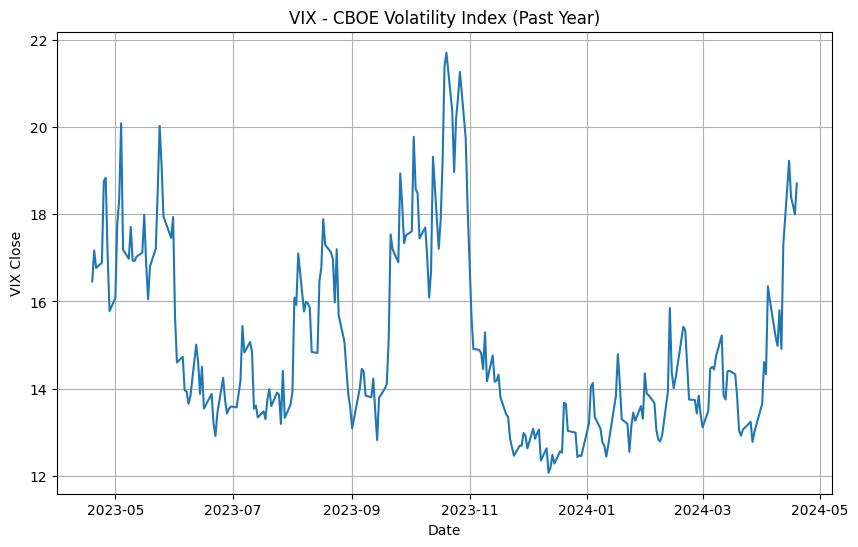

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the VIX ticker
vix_ticker = "^VIX"

# Create a ticker object
vix_data = yf.Ticker(vix_ticker)

# Fetch historical data for VIX
vix_history = vix_data.history(period="1y")  # Adjust the period as needed

# Plotting the VIX data
plt.figure(figsize=(10, 6))
plt.plot(vix_history.index, vix_history['Close'])
plt.title('VIX - CBOE Volatility Index (Past Year)')
plt.xlabel('Date')
plt.ylabel('VIX Close')
plt.grid(True)
plt.show()


# Question 7. [Exploratory] Time-driven strategy description around earnings releases
Free text answer

Explore earning dates for the whole month of April - e.g. using YahooFinance earnings calendar (https://finance.yahoo.com/calendar/earnings?from=2024-04-21&to=2024-04-27&day=2024-04-23). Compare with the previous closed earnings (e.g., recent dates with full data https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08).

Describe an analytical strategy/idea (you're not required to implement it) to select a subset companies of interest based on the future events data.

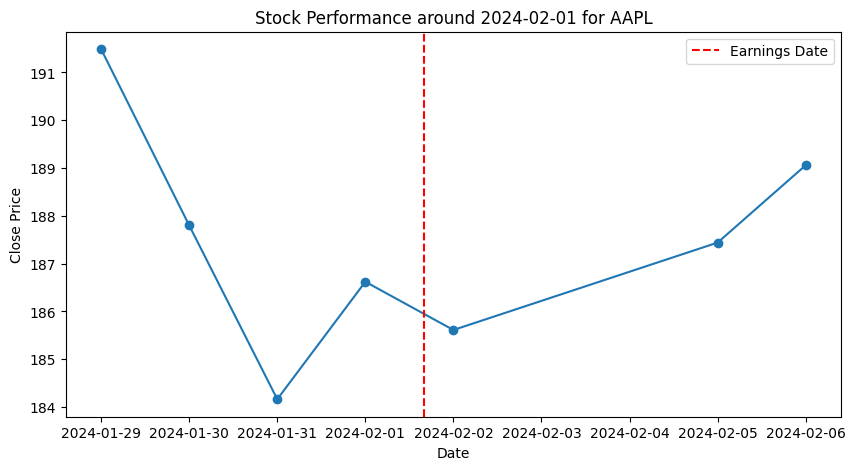

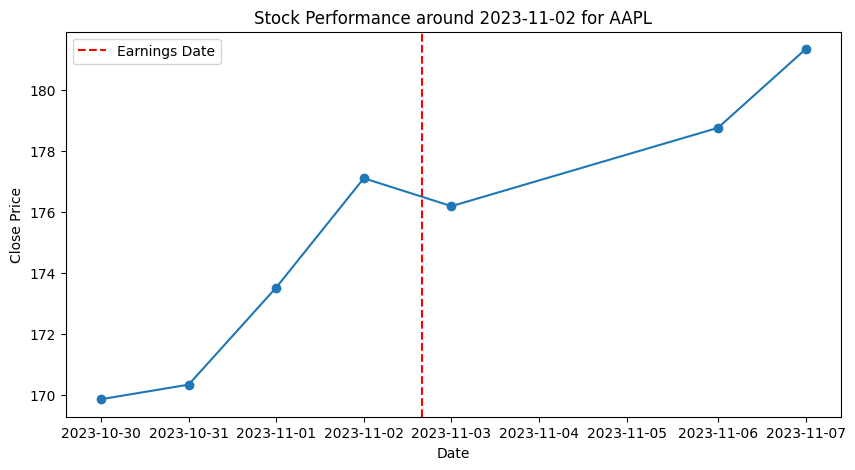

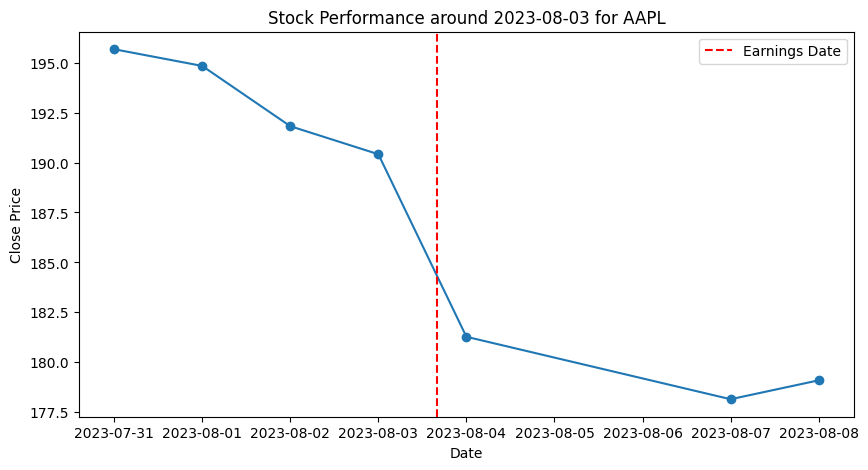

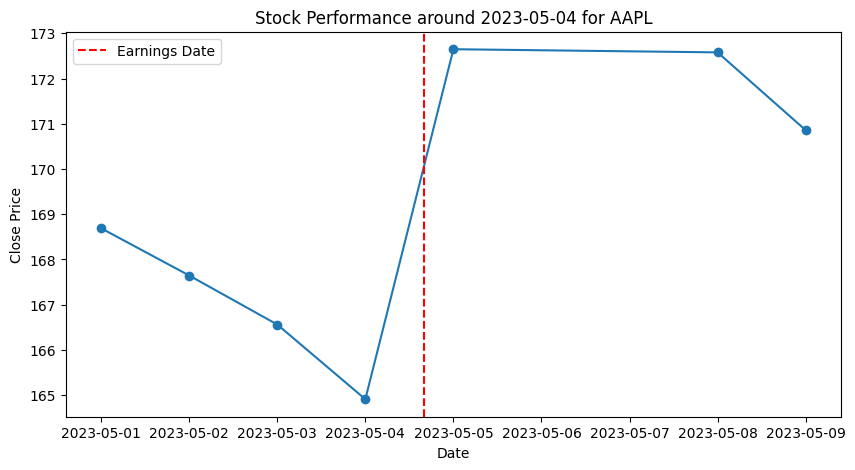

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Choose a stock symbol
stock_symbol = 'AAPL'

# Create a yfinance object for the stock
stock = yf.Ticker(stock_symbol)

# Fetch earnings data
earnings = stock.earnings_dates

# Fetch historical stock prices for the last year
hist_data = stock.history(period="1y")

# Function to analyze stock performance around earnings dates
def analyze_performance_around_earnings(hist_data, earnings, days_window=5):
    # Filter out earnings dates from the past year if they exist in the data
    filtered_earnings = earnings[(earnings.index > hist_data.index.min()) & (earnings.index < hist_data.index.max())]

    # Create plots for each earnings date
    for date in filtered_earnings.index:
        # Window around the earnings date
        start_date = date - pd.Timedelta(days=days_window)
        end_date = date + pd.Timedelta(days=days_window)

        # Filter historical data around the earnings date
        window_data = hist_data[start_date:end_date]

        # Plotting
        plt.figure(figsize=(10, 5))
        plt.title(f'Stock Performance around {date.date()} for {stock_symbol}')
        plt.plot(window_data.index, window_data['Close'], marker='o')
        plt.axvline(x=date, color='red', linestyle='--', label='Earnings Date')
        plt.legend()
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.show()

# Call the function
analyze_performance_around_earnings(hist_data, earnings)



Event Study Methodology: Analyze the impact of earnings announcements on stock prices using an event study framework. This involves studying stock returns over a short window around the earnings announcement date to capture abnormal returns.
Sentiment Analysis: Leverage news sentiment analysis leading up to the earnings release. High positive or negative sentiment might influence stock movements and can be a precursor to how the market will react